#Building the CNN Model
Building, training, and evaluating a Custom and pretrained CNN models. It prepares the data, defines and compiles the model, trains it with callbacks for checkpoints and learning rate adjustments, and finally evaluates and visualizes the model's performance.







In [ ]:
# Split the data into training+validation and test sets
train_val_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (37068, 2)
Validation set shape: (9268, 2)
Test set shape: (11584, 2)


In [ ]:
# Define target size
target_size = (64, 64)

# Load and preprocess images
X_train, y_train = load_and_preprocess_images(train_df, target_size)
X_val, y_val = load_and_preprocess_images(val_df, target_size)
X_test, y_test = load_and_preprocess_images(test_df, target_size)


In [ ]:
# One-hot encode labels
lb = LabelBinarizer()
lb.fit(train_df['label'])  # Fit on training labels
y_train = lb.transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)

In [ ]:
# Determine number of classes
num_classes = len(lb.classes_)

# Define the model
inp = layers.Input(shape=(64, 64, 3), dtype='float32', name='Input')

conv0 = layers.Conv2D(16, (3, 3), activation='relu', strides=2, padding='same', name='Conv0')(inp)
drop1 = layers.Dropout(0.2, name='Drop1')(conv0)

conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1')(drop1)
conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv2')(conv1)
drop2 = layers.Dropout(0.2, name='Drop2')(conv2)

pool1 = layers.MaxPooling2D((2, 2), name='Pool1')(drop2)

conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv3')(pool1)
conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv4')(conv3)
drop3 = layers.Dropout(0.2, name='Drop3')(conv4)

pool2 = layers.MaxPooling2D((2, 2), name='Pool2')(drop3)

conv5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv5')(pool2)
conv6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv6')(conv5)
drop4 = layers.Dropout(0.2, name='Drop4')(conv6)

pool3 = layers.MaxPooling2D((2, 2), name='Pool3')(drop4)

flatten = layers.Flatten(name='Flat')(pool3)

fc1 = layers.Dense(512, activation='relu', name='FC1')(flatten)
drop5 = layers.Dropout(0.5, name='Drop5')(fc1)

fc2 = layers.Dense(256, activation='relu', name='FC2')(drop5)
drop6 = layers.Dropout(0.5, name='Drop6')(fc2)

out = layers.Dense(num_classes, activation='sigmoid', name='Output')(drop6)

model = models.Model(inputs=inp, outputs=out)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv0 (Conv2D)                       │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop1 (Dropout)                      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop2 (Dropout)                      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop3 (Dropout)                      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv5 (Conv2D)                       │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv6 (Conv2D)                       │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop4 (Dropout)                      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flat (Flatten)                       │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop5 (Dropout)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop6 (Dropout)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 39)                  │          10,023 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,481,639 (5.65 MB)

 Trainable params: 1,481,639 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Define callbacks
checkpoint_filepath = '/content/checkpoints/best_weights.weights.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.01))

lr_callback = LearningRateScheduler(scheduler)

In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[checkpoint_callback, lr_callback],
    batch_size=32
)

# Load the best weights
model.load_weights(checkpoint_filepath)

Epoch 1/50
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0818 - loss: 0.2734 - precision_1: 0.0595 - recall_1: 0.1015
Epoch 1: val_loss improved from inf to 0.11002, saving model to /content/checkpoints/best_weights.weights.h5
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.0819 - loss: 0.2733 - precision_1: 0.0596 - recall_1: 0.1015 - val_accuracy: 0.4274 - val_loss: 0.1100 - val_precision_1: 0.8067 - val_recall_1: 0.2324 - learning_rate: 1.0000e-04
Epoch 2/50
1156/1159 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3657 - loss: 0.0920 - precision_1: 0.6603 - recall_1: 0.2436
Epoch 2: val_loss improved from 0.11002 to 0.08527, saving model to /content/checkpoints/best_weights.weights.h5
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3658 - loss: 0.0919 - precision_1: 0.6604 - recall_1: 0.2438 - val_accuracy: 0.5709 - val_loss: 0.0853 - val_precision_1: 0.8137 - val_recall_1: 0.3708 - learning_rate: 1.0000e-04
Epoch 3/50
1158/1159 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")



362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 0.0076 - precision_1: 0.9550 - recall_1: 0.9546
Test Loss: 0.007560383528470993
Test Accuracy: 0.9562327265739441
Test Precision: 0.9583730101585388
Test Recall: 0.955973744392395


History keys: dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1', 'learning_rate'])


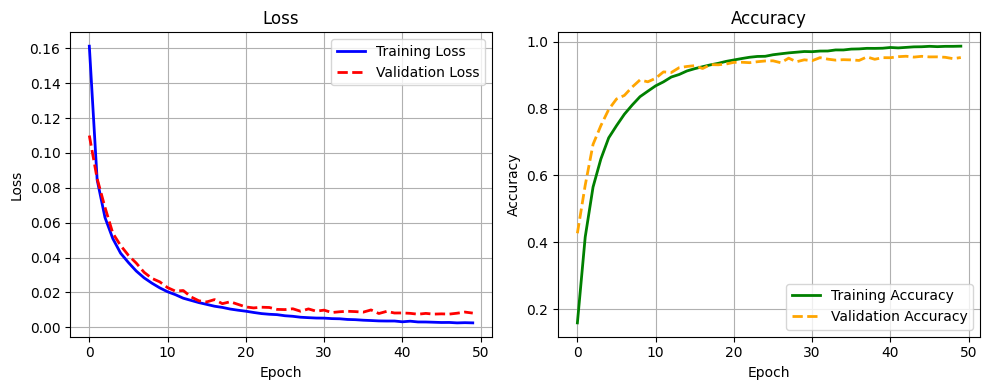

In [ ]:
# Print out the keys to check the correct names
print("History keys:", history.history.keys())

# Create a figure for the plots
plt.figure(figsize=(10, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Improve layout
plt.tight_layout()
plt.show()
